In [1]:
# ============================================
# 1. AFFINE TRANSFORMATION (FULLY CONNECTED)
# ============================================
import numpy as np

# misal input gambar 2x2 (diratakan jadi vektor 4)
x = np.array([1, 2, 3, 4])
W = np.random.randn(3, 4)   # 3 neuron, 4 input
b = np.random.randn(3)

# affine transform
output = np.dot(W, x) + b
print("Output Affine:", output)


Output Affine: [-0.32910941 -6.97978268  8.16548337]


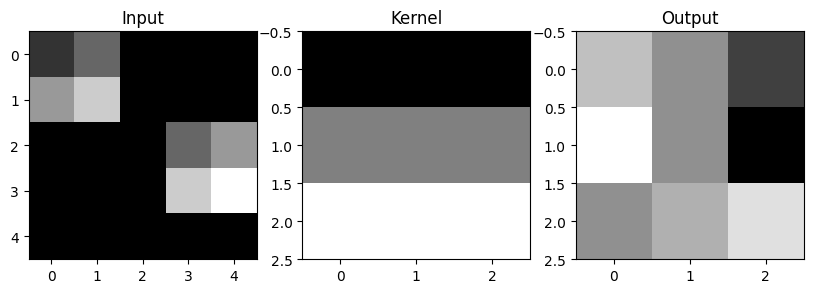

In [2]:
# ============================================
# 2. CONVOLUTION OPERATION (DENGAN NUMPY)
# ============================================
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# buat input sederhana (gambar 5x5)
image = np.array([
    [1, 2, 0, 0, 0],
    [3, 4, 0, 0, 0],
    [0, 0, 0, 2, 3],
    [0, 0, 0, 4, 5],
    [0, 0, 0, 0, 0]
])

# kernel 3x3 sederhana (deteksi tepi horizontal)
kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

# operasi konvolusi
conv_output = convolve2d(image, kernel, mode='valid')

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(image, cmap='gray'); plt.title("Input")
plt.subplot(1,3,2); plt.imshow(kernel, cmap='gray'); plt.title("Kernel")
plt.subplot(1,3,3); plt.imshow(conv_output, cmap='gray'); plt.title("Output")
plt.show()


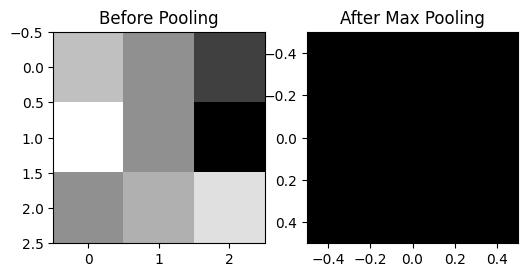

In [3]:
# ============================================
# 3. POOLING OPERATION
# ============================================
def max_pooling(feature_map, size=2, stride=2):
    h, w = feature_map.shape
    out_h = (h - size)//stride + 1
    out_w = (w - size)//stride + 1
    pooled = np.zeros((out_h, out_w))
    
    for i in range(0, h-size+1, stride):
        for j in range(0, w-size+1, stride):
            region = feature_map[i:i+size, j:j+size]
            pooled[i//stride, j//stride] = np.max(region)
    return pooled

pooled = max_pooling(conv_output, size=2, stride=2)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1); plt.imshow(conv_output, cmap='gray'); plt.title("Before Pooling")
plt.subplot(1,2,2); plt.imshow(pooled, cmap='gray'); plt.title("After Max Pooling")
plt.show()
